In [15]:
#Importing the neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [6]:
#Loading iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing the dataset


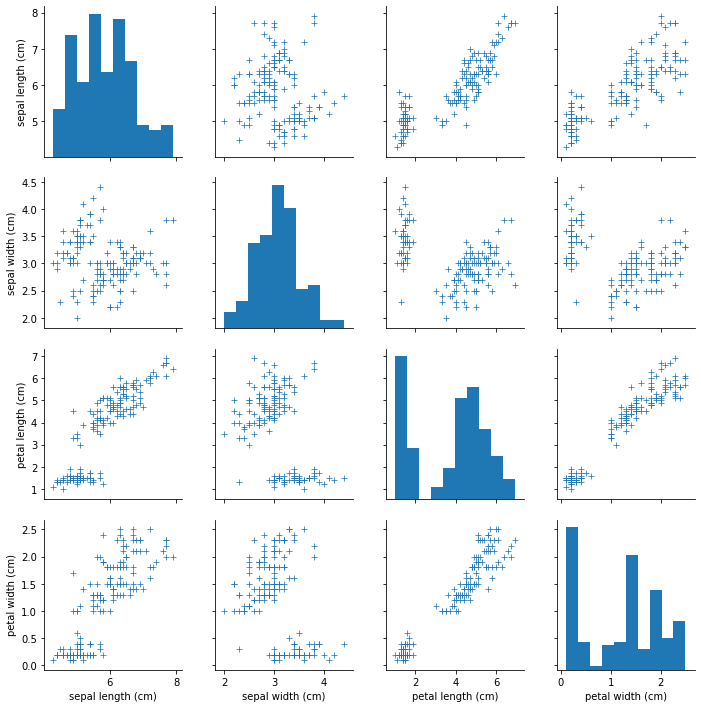

In [19]:
g = sns.pairplot(data, markers='+')
plt.show()

## We find the right number for k using within-Cluster sum of squares and changing cluster value from 1 to 10

In [11]:
from sklearn.cluster import KMeans
wcss=[]
k_range=10
for i in range(1,k_range+1):
    k=KMeans(i)
    k.fit(data)
    w=k.inertia_
    wcss.append(w)
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.3058152958153,
 30.185072738664847,
 28.168759740259745,
 25.999374018747588]

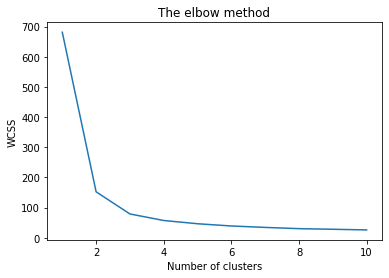

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

So we can say the elbow occurs at 3 so K = 3

In [25]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
pred = kmeans.fit_predict(data)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

##### Visualizing on first two columns

Text(0.5, 1.0, 'K=3 Sepal length vs sepal width')

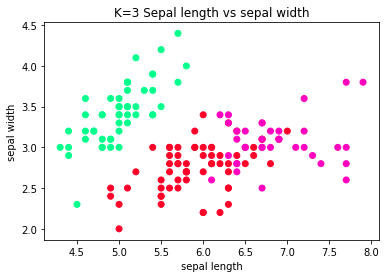

In [27]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=pred, cmap = 'gist_rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('K=3 Sepal length vs sepal width')

##### Visualizing on next two columns

Text(0.5, 1.0, 'K=2 petal length vs petal width')

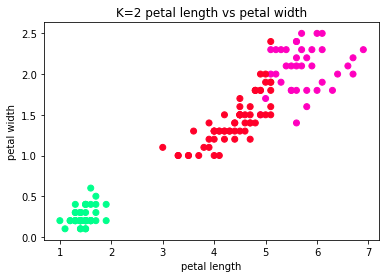

In [31]:
plt.scatter(data['petal length (cm)'], data['petal width (cm)'], c=pred, cmap = 'gist_rainbow')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('K=2 petal length vs petal width')

### So, with this we can say there are 3 types of iris flowers based on the (petal/sepal)'s width/length
